In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\tando\Downloads\adult.csv\adult.csv",sep=',', na_values='?')

In [3]:
df['income'][df['income']=='>50K']

7        >50K
9        >50K
10       >50K
11       >50K
12       >50K
         ... 
32539    >50K
32541    >50K
32547    >50K
32555    >50K
32558    >50K
Name: income, Length: 7841, dtype: object

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.duplicated().sum()

24

In [6]:
df=df.drop_duplicates()

In [7]:
df.shape

(32537, 15)

In [8]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [9]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [10]:
dfc=df

In [11]:
dfc.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [12]:
dfc.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
dfc['income'].value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [14]:
# 2 categories so categorizing <=50k as 0 and >50k as 1

In [15]:
# for i in dfc.index:
#     if(dfc['income'].iloc[i]=="<=50K"):
#         dfc['income'].iloc[i]=0
#     else:
#         dfc['income'].iloc[i]=1

In [16]:
dfc['income'].iloc[30000]

'>50K'

In [17]:
dfc['income'].replace({'<=50K':0,'>50K':1},inplace=True)

In [18]:
dfc.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [19]:
dfc['income'].value_counts()

0    24698
1     7839
Name: income, dtype: int64

In [20]:
# Univariate analysis

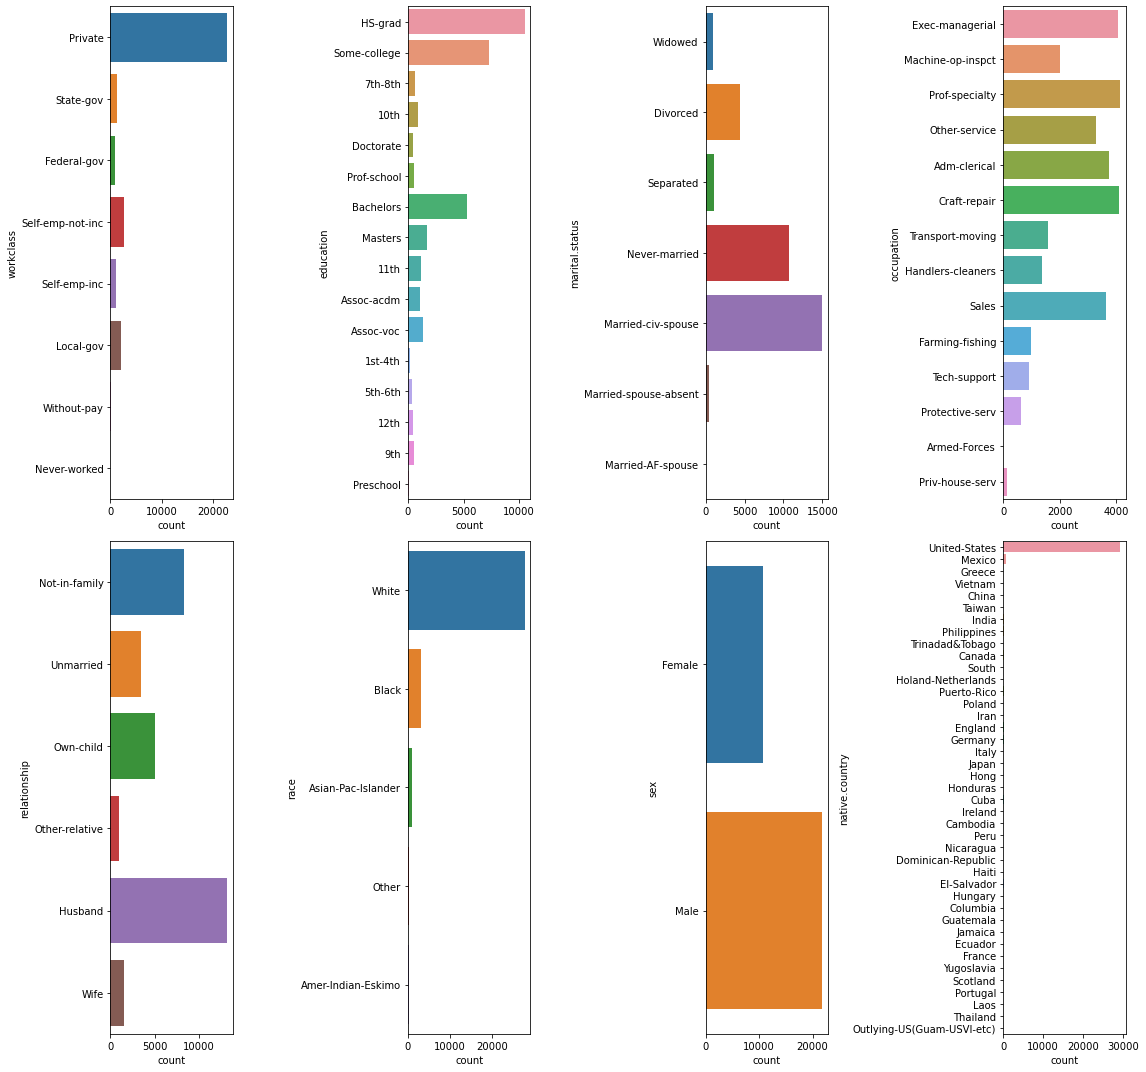

In [21]:
fig, axes = plt.subplots(2,4, figsize=(16,15))
row = 0
column = 0

for i, feature in enumerate(dfc.select_dtypes(include='object')):
    sns.countplot(y=feature, data=dfc,ax= axes[row][column])
    if column == 3:
        column = 0
        row += 1
    else:
        column +=1
fig.tight_layout()
plt.show()

In [22]:
dfc['native.country'].value_counts()

United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [23]:
# Visualizing Numerical Varian=bles

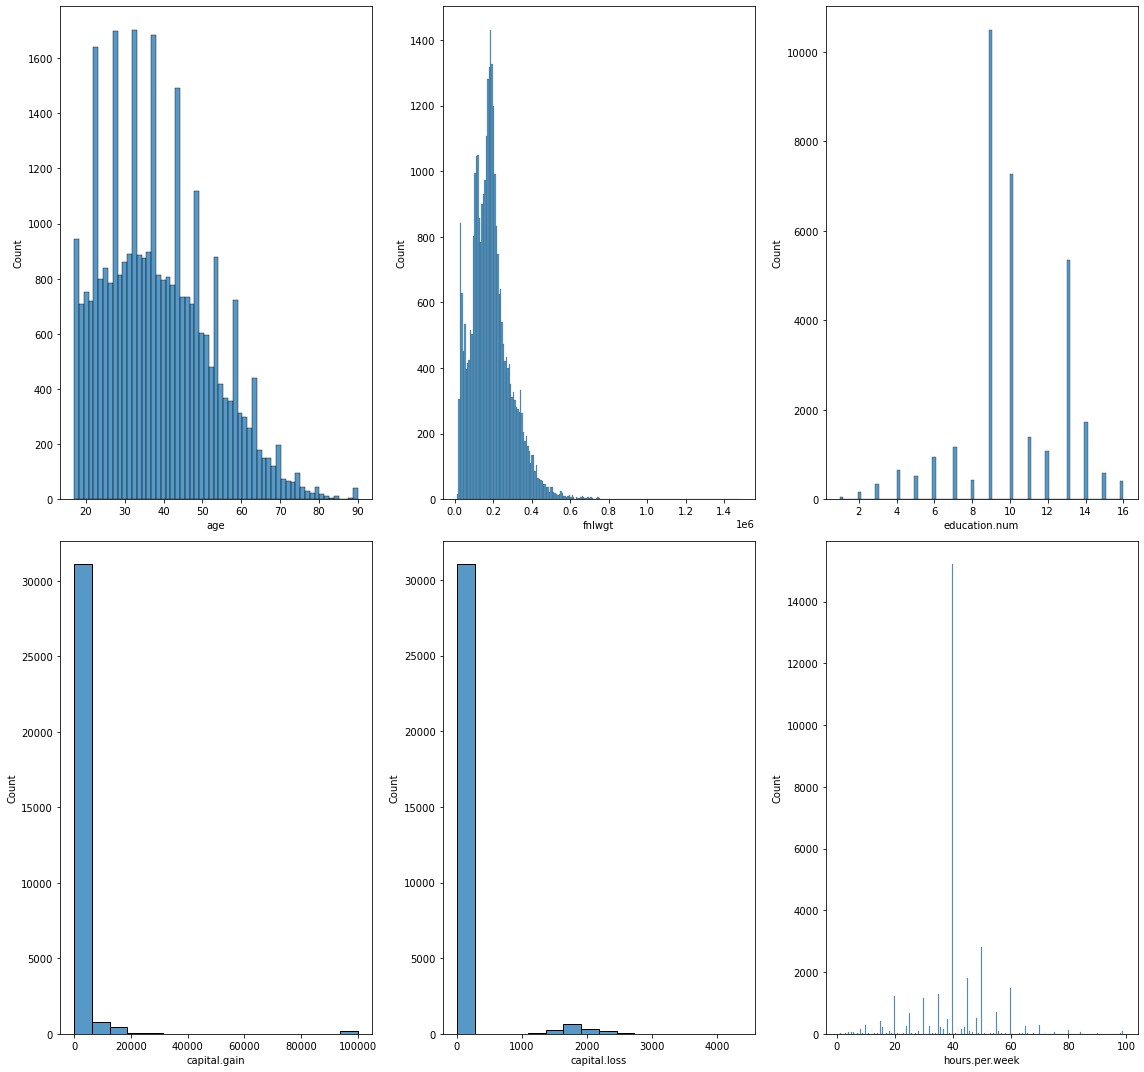

In [24]:
fig, axes = plt.subplots(2,3, figsize=(16,15))
row = 0
column = 0

for i, feature in enumerate(dfc.select_dtypes(include=['int', 'float'])):
    sns.histplot(x=feature, data=dfc,ax= axes[row][column])
    if column == 2:
        column = 0
        row = 1
    else:
        column +=1
fig.tight_layout()
plt.show()

In [25]:
# The age variable is slighlty right-skewed.

In [26]:
# Cat and Num feature

In [27]:
num_features=[col for col in dfc.columns if dfc[col].dtype!='O']
num_df = dfc[num_features]
num_df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
0,90,77053,9,0,4356,40,0
1,82,132870,9,0,4356,18,0
2,66,186061,10,0,4356,40,0
3,54,140359,4,0,3900,40,0
4,41,264663,10,0,3900,40,0


In [28]:
cat_features=[col for col in dfc.columns if dfc[col].dtype=='O']
cat_df = dfc[cat_features]
cat_df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country
0,NaN,HS-grad,Widowed,NaN,Not-in-family,White,Female,United-States
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States
2,NaN,Some-college,Widowed,NaN,Unmarried,Black,Female,United-States
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States


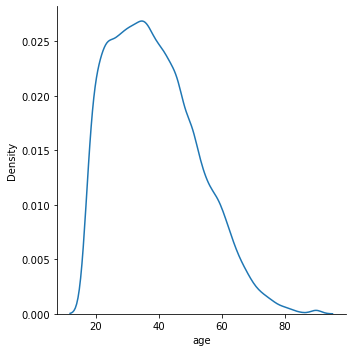

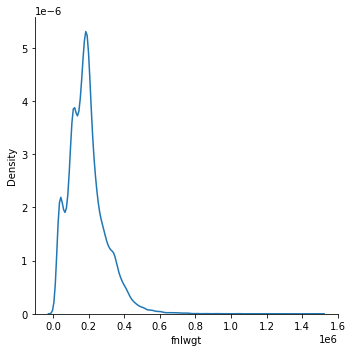

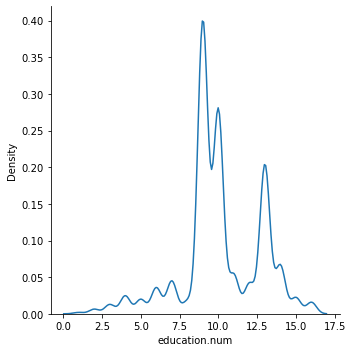

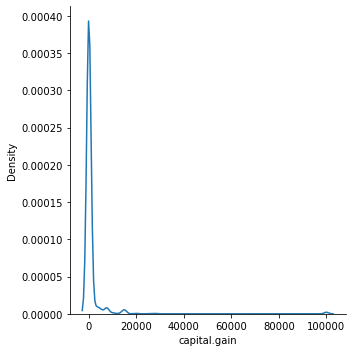

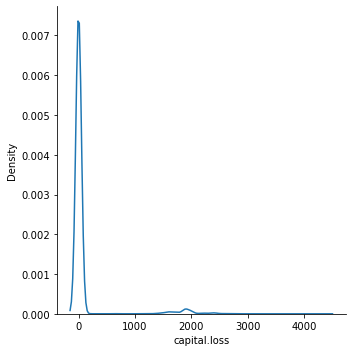

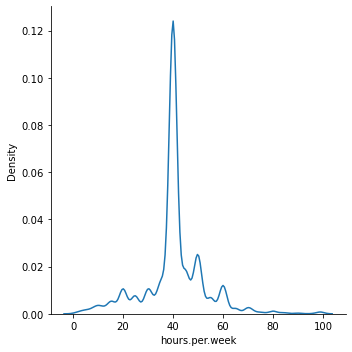

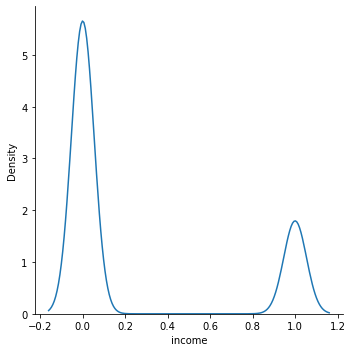

In [29]:
for i in num_features:
    sns.displot(dfc[i],kind='kde')

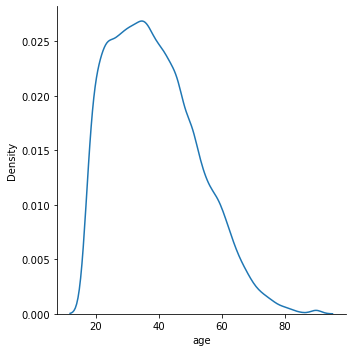

In [30]:
sns.displot(dfc['age'],kind='kde')

In [31]:
dfc['capital.income'] = dfc['capital.gain'] - dfc['capital.loss']

In [32]:
dfc=dfc.drop(['capital.gain','capital.loss'],axis=1)

In [33]:
dfc.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
hours.per.week       0
native.country     582
income               0
capital.income       0
dtype: int64

In [34]:
dfc=dfc.dropna()

In [35]:
dfc.shape

(30139, 14)

In [36]:
df.shape

(32537, 16)

In [37]:
dfc.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
hours.per.week    0
native.country    0
income            0
capital.income    0
dtype: int64

In [38]:
# Bloxplottocheck outliers

<AxesSubplot:>

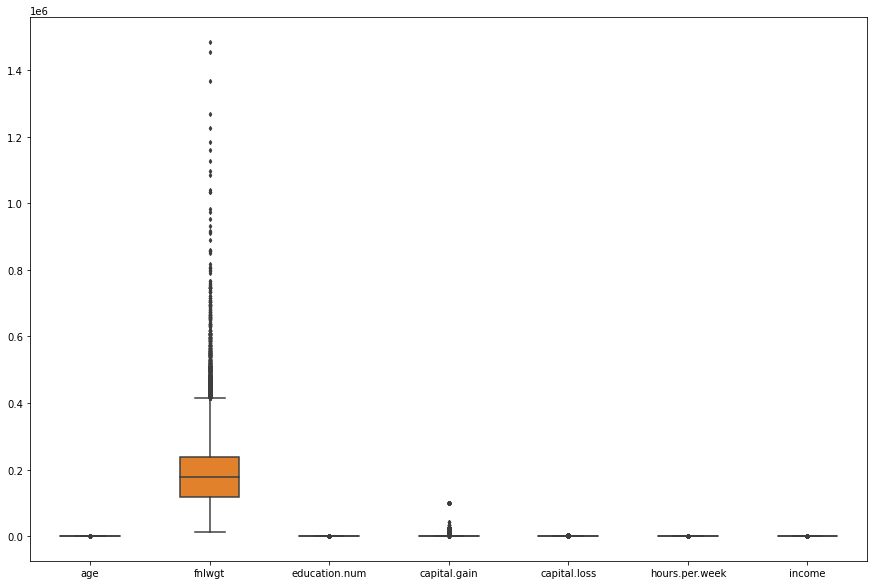

In [39]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=num_df, width= 0.5,ax=ax,  fliersize=3)

In [40]:
from sklearn import preprocessing
from collections import Counter

In [41]:
print(sorted(Counter(dfc['income']).items()))

[(0, 22633), (1, 7506)]


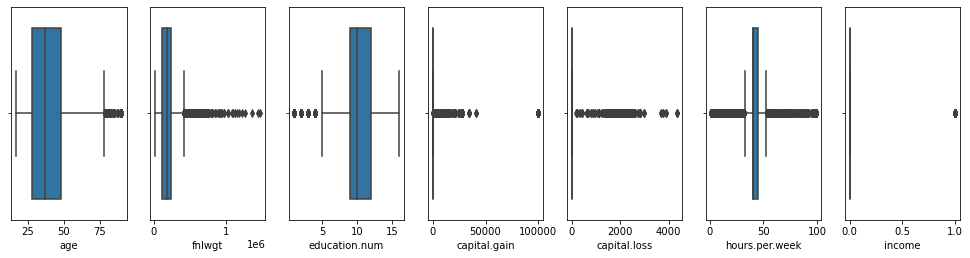

In [42]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

In [43]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [44]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [45]:
replace_with_thresholds(num_df, num_df.columns)

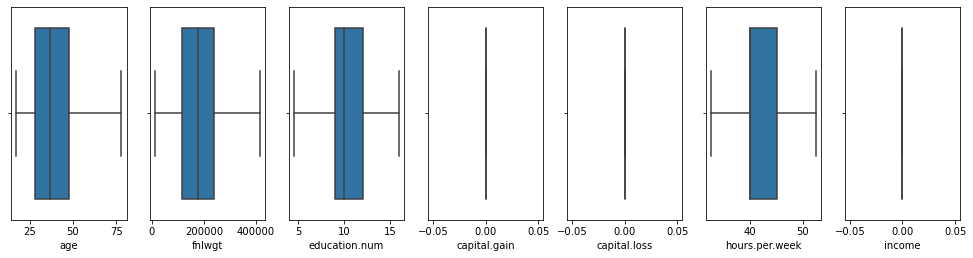

In [46]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

In [47]:
# dfc['marital.status'] = dfc['marital.status'].replace({"Never-married":"Single","Divorced":"Single","Separated":"Single",
#                                                      "Widowed":"Single","Married-spouse-absent":"Single",
#                                                      "Married-civ-spouse":"Married","Married-AF-spouse":"Married"})

# dfc["workclass"] = dfc["workclass"].replace({"Private":"Paid_Employed","Self-emp-not-inc":"Paid_Employed",
#                                            "Local-gov":"Paid_Employed","unknown":"Paid_Employed",
#                                            "State-gov":"Paid_Employed","Self-emp-inc":"Paid_Employed",
#                                            "Federal-gov":"Paid_Employed","Without-pay":"Unpaid_Employed",
#                                            "Never-worked":"UnEmployed",})

# dfc['education'] = dfc['education'].replace({'Preschool':'Not-grad','1st-4th':'Not-grad','5th-6th':'Not-grad',
#                                            '7th-8th':'Not-grad','9th':'Not-grad','10th':'Not-grad',
#                                            '11th':'Not-grad','12th':'Not-grad',})



In [48]:
dfc.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital.income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0,-4356
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0,-3900
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,0,-3900
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,0,-3770
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,0,-3770


In [49]:
dfc.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital.income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0,-4356
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0,-3900
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,0,-3900
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,0,-3770
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,0,-3770


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
countries = dfc['native.country'].unique()[1:]

In [52]:
countries

array(['Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan', 'India',
       'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'Hungary', 'Columbia', 'Guatemala', 'El-Salvador', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Portugal', 'Laos', 'Thailand',
       'Outlying-US(Guam-USVI-etc)', 'Scotland'], dtype=object)

In [53]:
# Transforming native country column with value as either United States or Other.

dfc['native.country'] = dfc['native.country'].replace(to_replace=countries, value='other')

In [54]:
dfc.head(500)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital.income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0,-4356
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0,-3900
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,0,-3900
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,0,-3770
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,0,-3770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531,23,Private,188545,Assoc-acdm,12,Never-married,Adm-clerical,Own-child,White,Female,20,United-States,0,-1974
532,24,Federal-gov,210736,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,Female,40,United-States,0,-1974
533,62,Private,81116,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Male,40,United-States,0,-1974
534,77,Self-emp-not-inc,71676,Some-college,10,Widowed,Adm-clerical,Not-in-family,White,Female,1,United-States,0,-1944


In [55]:
dfc.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
hours.per.week     int64
native.country    object
income             int64
capital.income     int64
dtype: object

In [56]:
dfc.duplicated().sum()

0

In [57]:
# Detailed EDA


In [58]:
# define numerical & categorical columns
numeric_features = [feature for feature in dfc.columns if dfc[feature].dtype != 'O']
categorical_features = [feature for feature in dfc.columns if dfc[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))


We have 6 numerical features : ['age', 'fnlwgt', 'education.num', 'hours.per.week', 'income', 'capital.income']

We have 8 categorical features : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


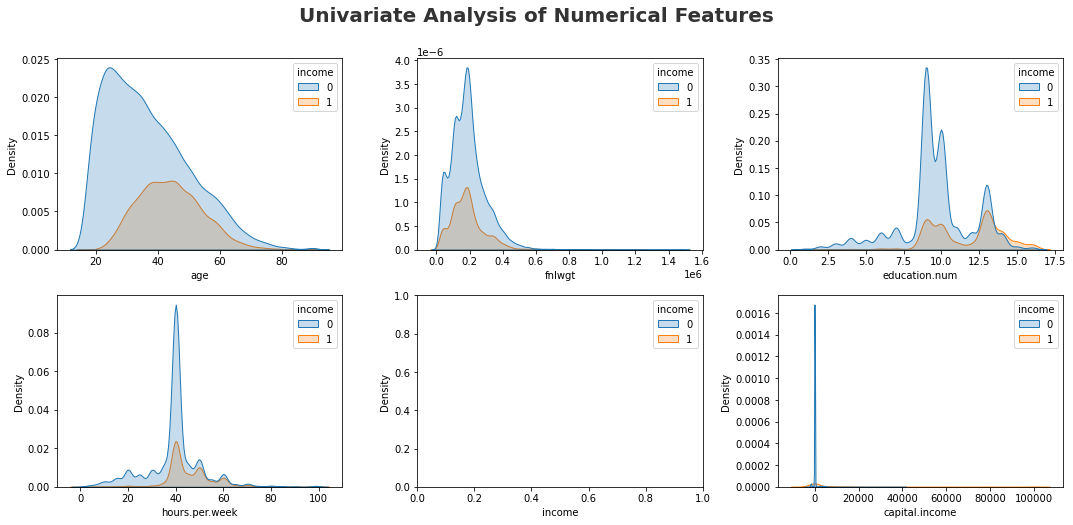

In [59]:
# Univariate Analysis of Numerical Columns
plt.figure(figsize=(15, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 3, i+1)
    sns.kdeplot(x=dfc[numeric_features[i]],shade=True, color='b',hue='income',data=dfc)
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

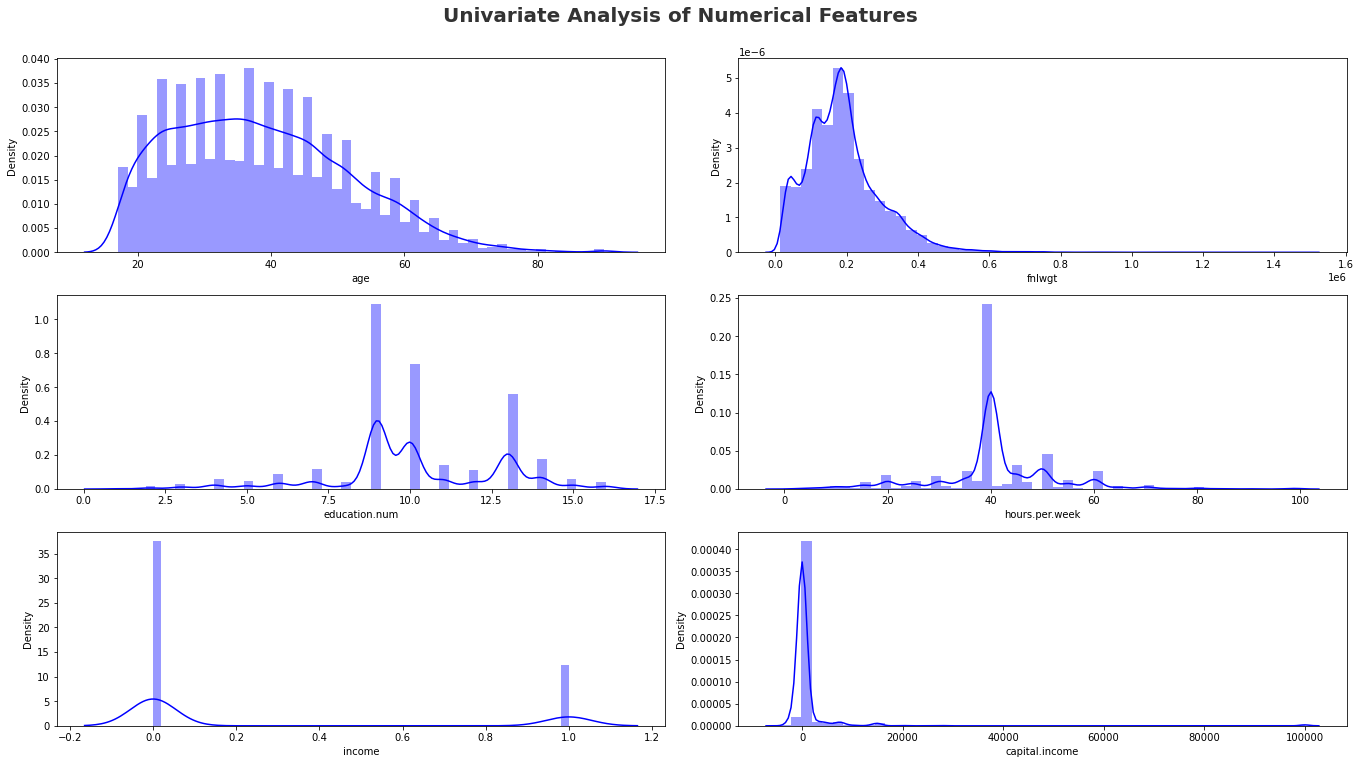

In [60]:
plt.figure(figsize=(19, 20))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(6, 2, i+1)
    sns.distplot(x=dfc[numeric_features[i]],kde=True, color="blue")
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


In [61]:
# Univariate analysis of categorical columns

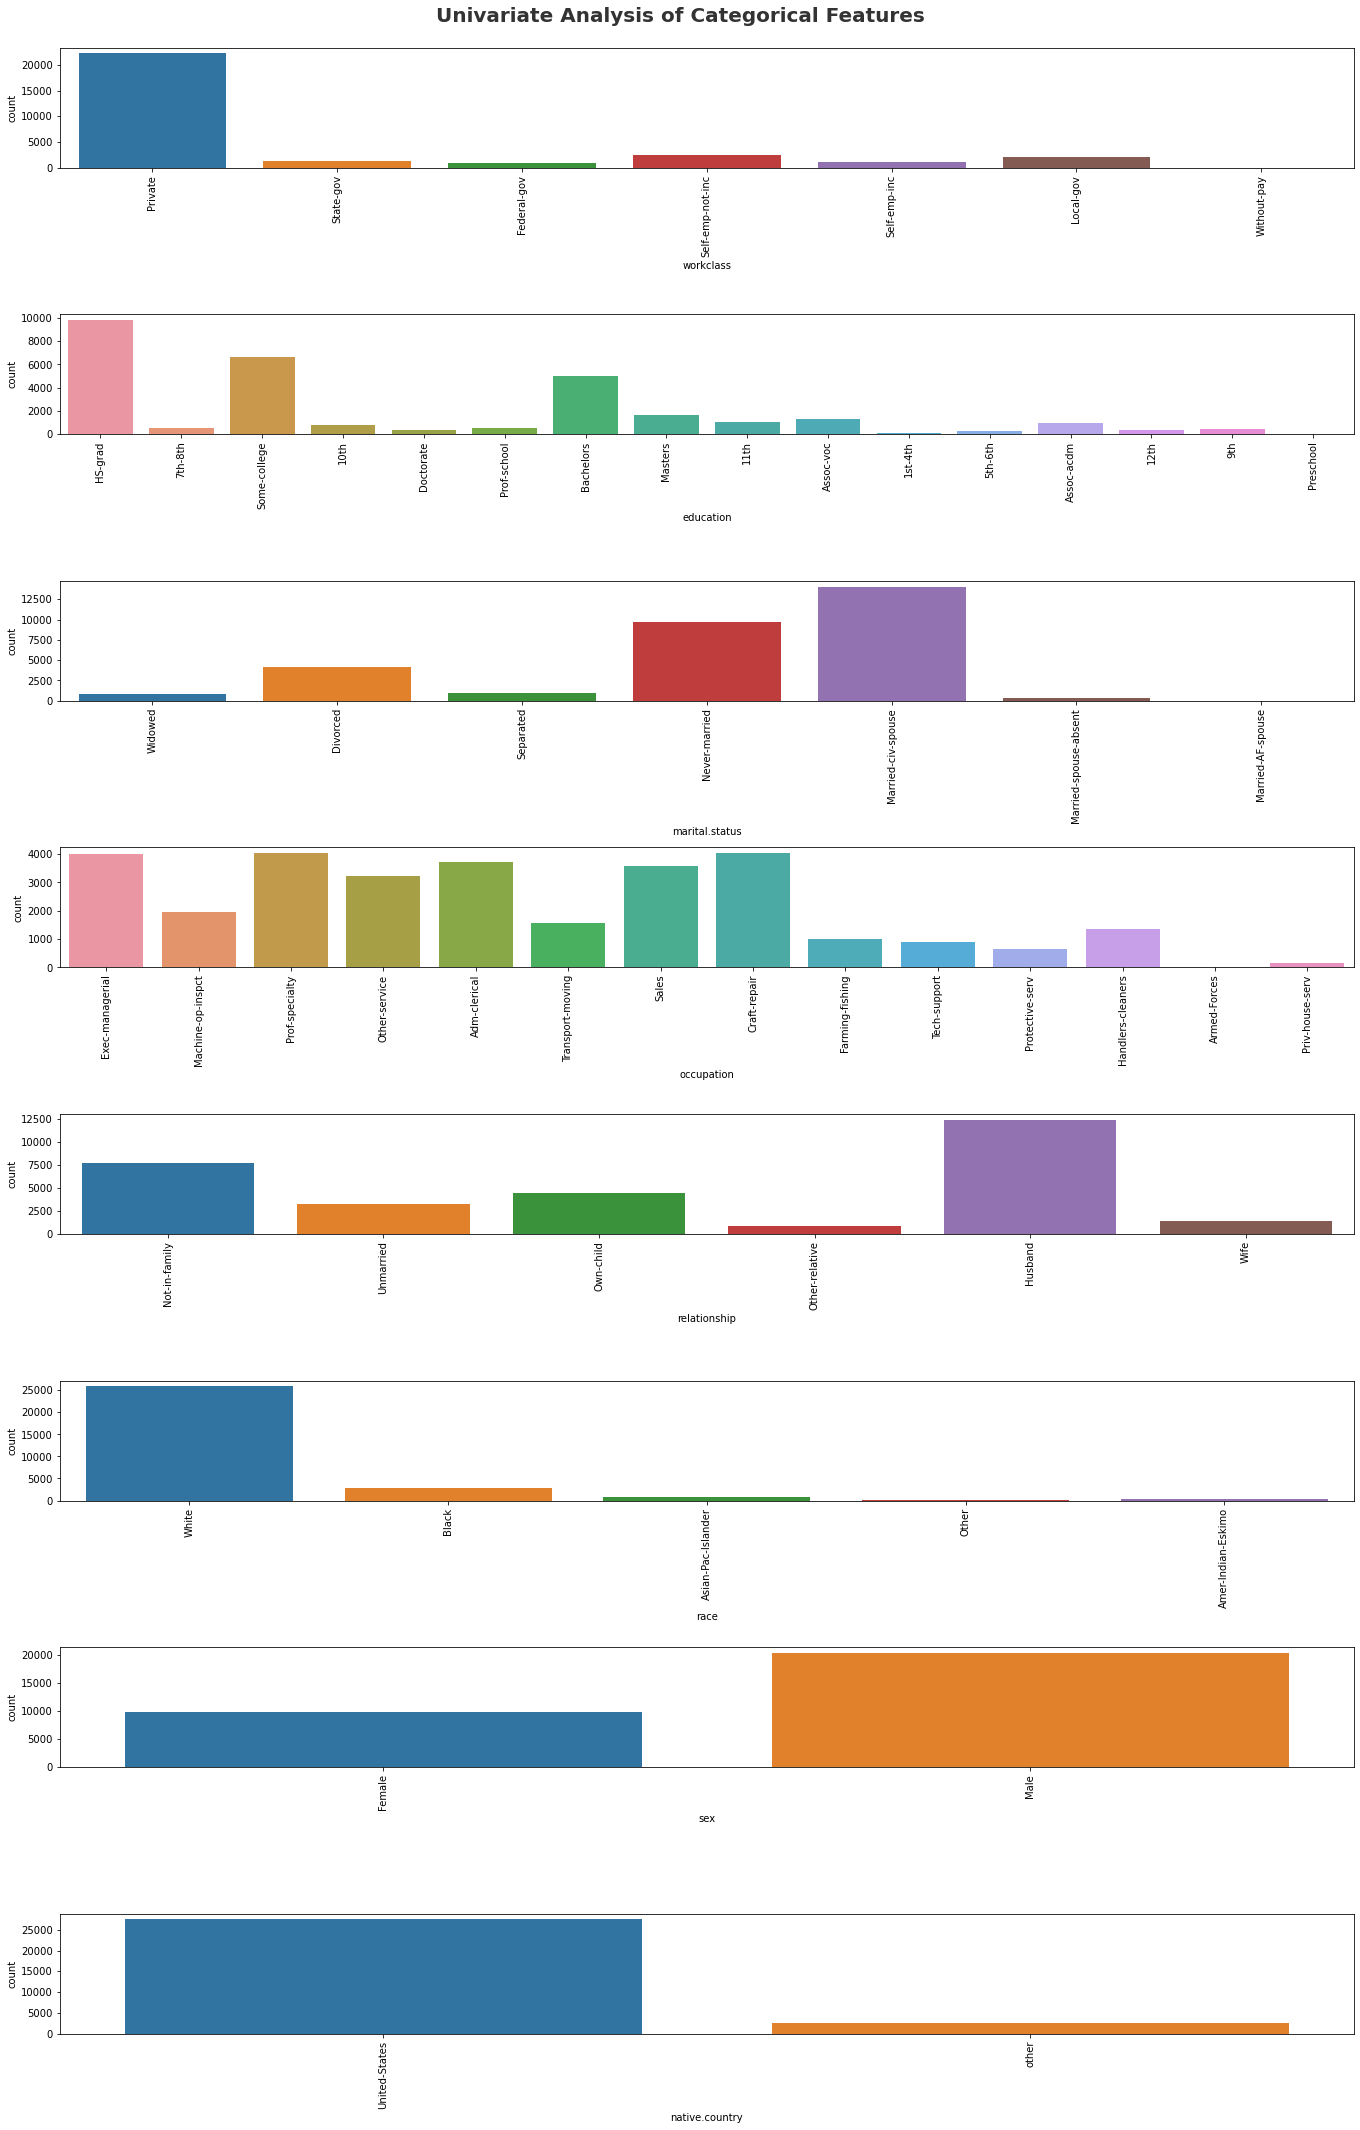

In [62]:
plt.figure(figsize=(19, 32))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(categorical_features)):
    plt.subplot(9, 1, i+1)
    sns.countplot(x=dfc[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.xticks(rotation=90)
    plt.tight_layout()

<AxesSubplot:xlabel='income', ylabel='count'>

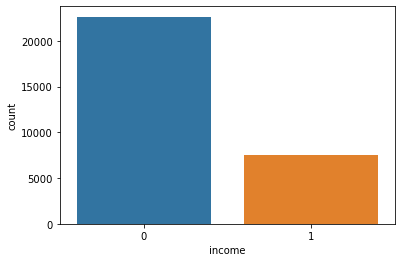

In [63]:
sns.countplot(x='income', data=dfc)

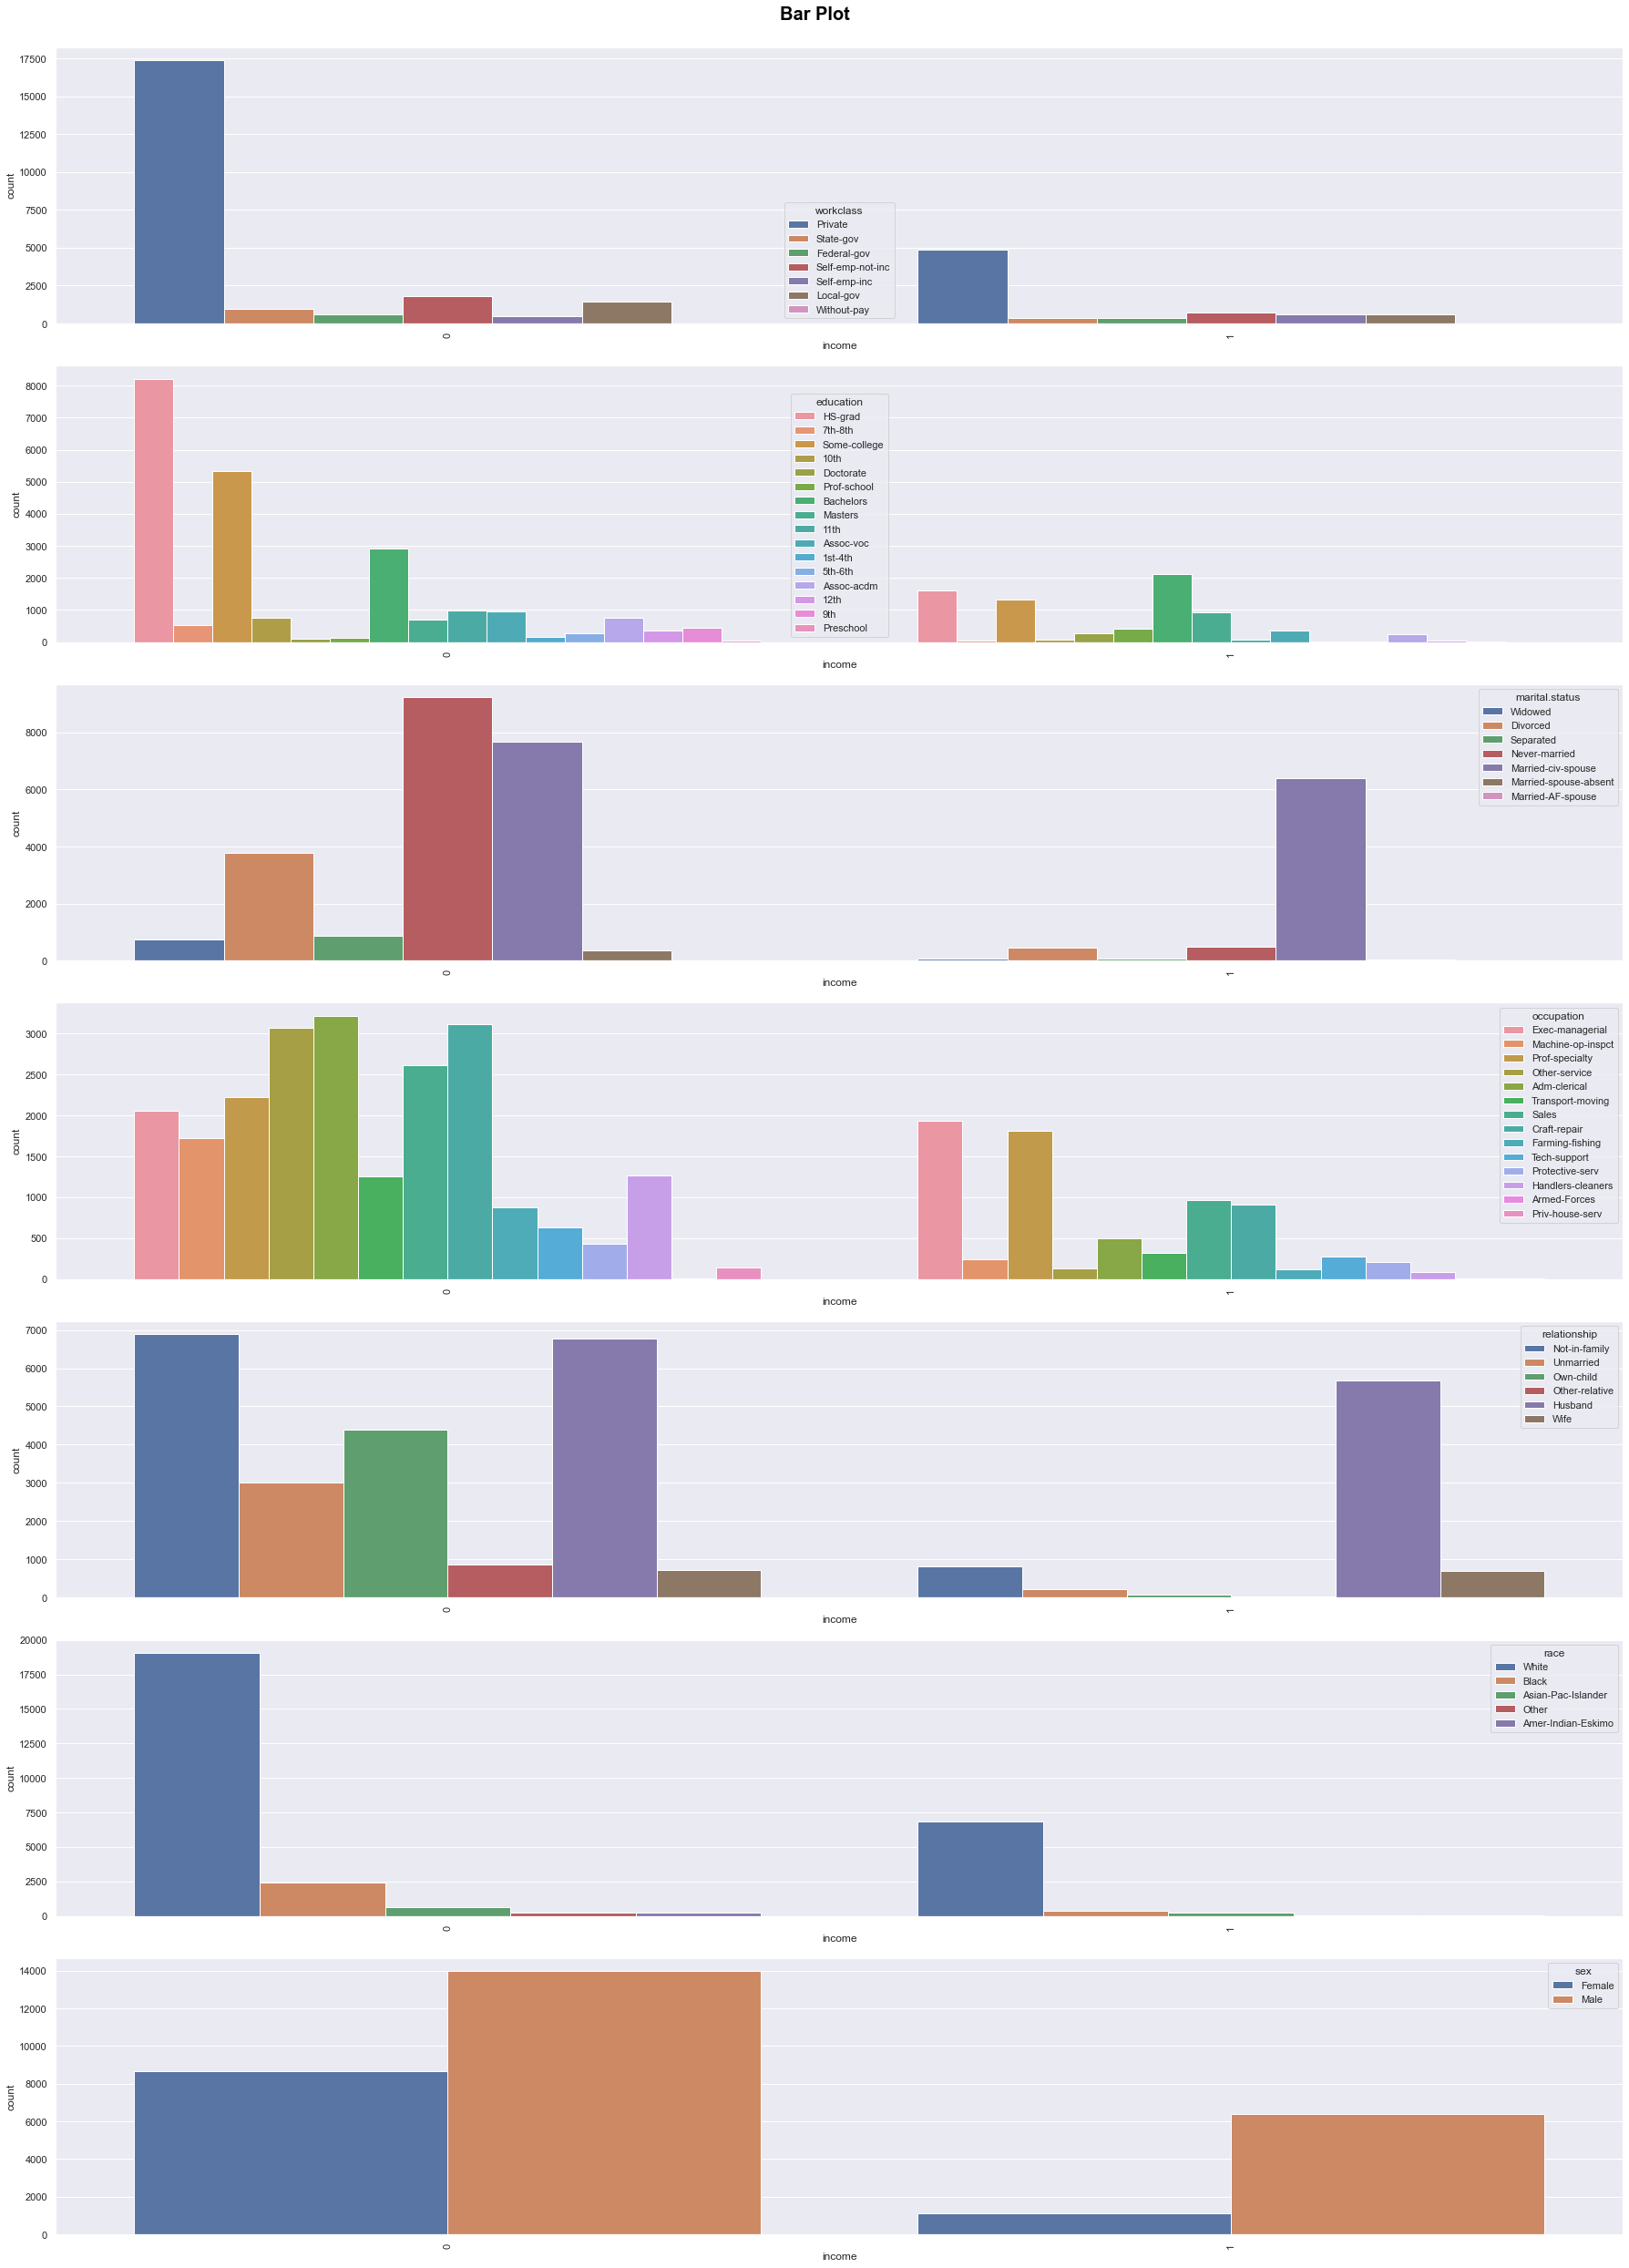

In [64]:
# Bar plot to see the relationship between numerical features and target
plt.figure(figsize=(25, 39))
plt.suptitle('Bar Plot', fontsize=20, fontweight='bold', alpha=1, y=1)
sns.set(style = 'darkgrid', font_scale = 1)
for i in range(0, len(categorical_features)-1):
    plt.subplot(8, 1, i+1)
    #sns.barplot(y='income', x=categorical_features[i], data=income_census_df)
    sns.countplot(x='income', hue=categorical_features[i], data=dfc)
    plt.xticks(rotation = 90)
    plt.tight_layout()



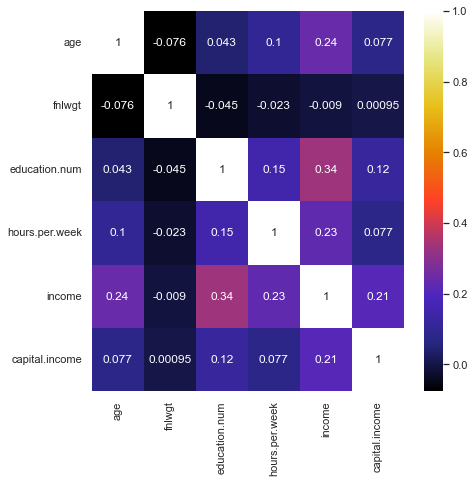

In [65]:
# To check the multicollinearity

plt.figure(figsize = (7,7))
sns.heatmap(dfc.corr(), cmap="CMRmap", annot=True)
plt.show()


In [66]:
# Creating dummies variables
train_data_dummie = pd.get_dummies(dfc,drop_first=True)
train_data_dummie.tail()

,age,fnlwgt,education.num,hours.per.week,income,capital.income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_other
32556,22,310152,10,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
32557,27,257302,12,38,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
32558,40,154374,9,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
32559,58,151910,9,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
32560,22,201490,9,20,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,1,0


In [67]:
train_data_dummie

,age,fnlwgt,education.num,hours.per.week,income,capital.income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_other
1,82,132870,9,18,0,-4356,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,140359,4,40,0,-3900,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,41,264663,10,40,0,-3900,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
5,34,216864,9,45,0,-3770,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6,38,150601,6,40,0,-3770,0,1,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,310152,10,40,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
32557,27,257302,12,38,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
32558,40,154374,9,40,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
32559,58,151910,9,40,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [68]:
print("Total No. of features after creating dummie variable : {}\n".format(len(train_data_dummie.columns)))
print('--Features--\n')
for i in train_data_dummie.columns:
    print(i)
print('---------------------------')

Total No. of features after creating dummie variable : 57

--Features--

age
fnlwgt
education.num
hours.per.week
income
capital.income
workclass_Local-gov
workclass_Private
workclass_Self-emp-inc
workclass_Self-emp-not-inc
workclass_State-gov
workclass_Without-pay
education_11th
education_12th
education_1st-4th
education_5th-6th
education_7th-8th
education_9th
education_Assoc-acdm
education_Assoc-voc
education_Bachelors
education_Doctorate
education_HS-grad
education_Masters
education_Preschool
education_Prof-school
education_Some-college
marital.status_Married-AF-spouse
marital.status_Married-civ-spouse
marital.status_Married-spouse-absent
marital.status_Never-married
marital.status_Separated
marital.status_Widowed
occupation_Armed-Forces
occupation_Craft-repair
occupation_Exec-managerial
occupation_Farming-fishing
occupation_Handlers-cleaners
occupation_Machine-op-inspct
occupation_Other-service
occupation_Priv-house-serv
occupation_Prof-specialty
occupation_Protective-serv
occupatio

In [ ]:
# Here the number of features are 54, so one can perform one hot encoding too

In [69]:
# from sklearn.preprocessing import LabelEncoder
# temp_data = dfc
# for col in temp_data.columns:
#     if temp_data[col].dtypes == 'object':
#         encoder = LabelEncoder()
#         temp_data[col] = encoder.fit_transform(temp_data[col])

In [70]:
# # Correlation Heatmap
# plt.figure(figsize=[14,8])
# sns.heatmap(train_data_dummie.corr(), annot=True, cmap='RdYlGn', vmax=.5)
# plt.show()

In [71]:
dfc

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,hours.per.week,native.country,income,capital.income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,18,United-States,0,-4356
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,40,United-States,0,-3900
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,40,United-States,0,-3900
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,45,United-States,0,-3770
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,40,United-States,0,-3770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,40,United-States,0,0
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,0
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,0
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,0


In [72]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore');

In [73]:
# Droping those features which we are not going to use
final_features = train_data_dummie.drop(['fnlwgt','education.num'], axis=1)

In [74]:
X = final_features.drop(['income'],axis=1)
y = final_features['income']

In [75]:
X=X.dropna()

In [76]:
X.isnull().sum()

age                                     0
hours.per.week                          0
capital.income                          0
workclass_Local-gov                     0
workclass_Private                       0
workclass_Self-emp-inc                  0
workclass_Self-emp-not-inc              0
workclass_State-gov                     0
workclass_Without-pay                   0
education_11th                          0
education_12th                          0
education_1st-4th                       0
education_5th-6th                       0
education_7th-8th                       0
education_9th                           0
education_Assoc-acdm                    0
education_Assoc-voc                     0
education_Bachelors                     0
education_Doctorate                     0
education_HS-grad                       0
education_Masters                       0
education_Preschool                     0
education_Prof-school                   0
education_Some-college            

In [77]:
X.isnull().sum()

age                                     0
hours.per.week                          0
capital.income                          0
workclass_Local-gov                     0
workclass_Private                       0
workclass_Self-emp-inc                  0
workclass_Self-emp-not-inc              0
workclass_State-gov                     0
workclass_Without-pay                   0
education_11th                          0
education_12th                          0
education_1st-4th                       0
education_5th-6th                       0
education_7th-8th                       0
education_9th                           0
education_Assoc-acdm                    0
education_Assoc-voc                     0
education_Bachelors                     0
education_Doctorate                     0
education_HS-grad                       0
education_Masters                       0
education_Preschool                     0
education_Prof-school                   0
education_Some-college            

In [78]:
y=y.dropna()

In [79]:
y

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30139, dtype: int64

In [80]:
# Feature scaling on training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X[['age', 'capital.income', 'hours.per.week']])

StandardScaler()

In [81]:
input_scaled = scaler.transform(X[['age', 'capital.income', 'hours.per.week']])
scaled = pd.DataFrame(input_scaled,columns=['age', 'capital.income', 'hours.per.week'])

In [82]:
scaled

,age,capital.income,hours.per.week
0,3.317157,-0.721159,-1.914647
1,1.184832,-0.659812,-0.078031
2,0.194824,-0.659812,-0.078031
3,-0.338257,-0.642322,0.339381
4,-0.033639,-0.642322,-0.078031
...,...,...,...
30134,-1.252110,-0.135127,-0.078031
30135,-0.871338,-0.135127,-0.244996
30136,0.118670,-0.135127,-0.078031
30137,1.489450,-0.135127,-0.078031


In [83]:
X

,age,hours.per.week,capital.income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_other
1,82,18,-4356,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,54,40,-3900,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,41,40,-3900,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,34,45,-3770,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,38,40,-3770,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
32557,27,38,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
32558,40,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
32559,58,40,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [84]:
X_new=X.drop(['age','hours.per.week','capital.income'],axis=1)

In [85]:
X_new

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_other
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
32557,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
32558,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
32559,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [86]:
scaled

,age,capital.income,hours.per.week
0,3.317157,-0.721159,-1.914647
1,1.184832,-0.659812,-0.078031
2,0.194824,-0.659812,-0.078031
3,-0.338257,-0.642322,0.339381
4,-0.033639,-0.642322,-0.078031
...,...,...,...
30134,-1.252110,-0.135127,-0.078031
30135,-0.871338,-0.135127,-0.244996
30136,0.118670,-0.135127,-0.078031
30137,1.489450,-0.135127,-0.078031


In [87]:
scaled.shape

(30139, 3)

In [88]:
X_new.shape

(30139, 51)

In [89]:
X.reset_index(inplace = True, drop = True)

In [90]:
X

,age,hours.per.week,capital.income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_other
0,82,18,-4356,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,54,40,-3900,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,41,40,-3900,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,34,45,-3770,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,38,40,-3770,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,22,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
30135,27,38,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
30136,40,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
30137,58,40,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [91]:
X_new.reset_index(inplace = True, drop = True)

In [92]:
X_new

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_other
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
30135,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
30136,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
30137,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [93]:
frames = [X_new, scaled]

In [94]:
X_scaled = pd.concat(frames,axis=1,ignore_index=True)

In [95]:
X_scaled.shape

(30139, 54)

In [96]:
X_scaled.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
50    0
51    0
52    0
53    0
dtype: int64

In [97]:
X

,age,hours.per.week,capital.income,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,...,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Asian-Pac-Islander,race_Black,race_Other,race_White,sex_Male,native.country_other
0,82,18,-4356,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,54,40,-3900,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,41,40,-3900,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,34,45,-3770,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,38,40,-3770,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30134,22,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
30135,27,38,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
30136,40,40,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
30137,58,40,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [98]:
# without balancing

In [99]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [100]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [101]:
# Training Model
lr.fit(X_train,y_train)

LogisticRegression()

In [102]:
# Model Summary
y_pred_lr = lr.predict(X_test)
y_pred_train_lr = lr.predict(X_train)

In [103]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_lr), 4))
# print('F1 score:', round(f1_score(y_test, y_pred_lr), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_lr), 4))
# print('F1 score:', round(f1_score(y_train, y_pred_train_lr), 4))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.8469

-----Train Data Accuracy----
Accuracy score: 0.8424


In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [105]:
conf_mat = confusion_matrix(y_test,y_pred_lr)
conf_mat

array([[4243,  337],
       [ 586,  862]], dtype=int64)

In [106]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [107]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8468812209688122

In [108]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9264192139737991

In [109]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8786498239801201

In [110]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9019024338399406

In [111]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, y_pred_lr)

In [112]:
auc_score

0.7608615406885569

In [113]:
# After balancing

In [114]:
y.value_counts()

0    22633
1     7506
Name: income, dtype: int64

In [115]:
import imblearn
from imblearn import under_sampling, over_sampling

In [116]:
# Oversampling

In [117]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_Oresampled,y_Oresampled=ros.fit_resample(X_scaled,y)

In [118]:
X_Oresampled.shape

(45266, 54)

In [119]:
y_Oresampled.value_counts()

0    22633
1    22633
Name: income, dtype: int64

In [120]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_Oresampled, y_Oresampled, test_size=0.33, random_state=42)

In [121]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()


In [122]:
# Training Model
lr.fit(X_train,y_train)

LogisticRegression()

In [123]:
# Model Summary
y_pred_OS = lr.predict(X_test)
y_pred_train_OS_lr = lr.predict(X_train)

In [124]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_OS), 4))
# print('F1 score:', round(f1_score(y_test, y_pred_lr), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_OS_lr), 4))
# print('F1 score:', round(f1_score(y_train, y_pred_train_lr), 4))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.8199

-----Train Data Accuracy----
Accuracy score: 0.8193


In [125]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [126]:
conf_mat = confusion_matrix(y_test,y_pred_OS)
conf_mat

array([[5956, 1557],
       [1133, 6292]], dtype=int64)

In [127]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [128]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8199223456955416

In [129]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.792759217356582

In [130]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.8401749188884187

In [131]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8157786604574716

In [132]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, y_pred_OS)

In [133]:
auc_score

0.8200833123819946

In [134]:
# Undersampling

In [135]:
from imblearn.under_sampling import RandomUnderSampler
rus=RandomUnderSampler(random_state=0)
X_Uresampled,y_Uresampled=rus.fit_resample(X_scaled,y)

In [136]:
y_Uresampled.value_counts()

0    7506
1    7506
Name: income, dtype: int64

In [137]:
X_train, X_test, y_train, y_test = train_test_split(
...     X_Uresampled, y_Uresampled, test_size=0.33, random_state=42)

In [138]:
# Model Building
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [139]:
# Training Model
lr.fit(X_train,y_train)

LogisticRegression()

In [140]:
# Model Summary
y_pred_US = lr.predict(X_test)
y_pred_train_US_lr = lr.predict(X_train)

In [141]:
print("-----Test Data Accuracy----")
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_US), 4))
# print('F1 score:', round(f1_score(y_test, y_pred_lr), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_US_lr), 4))
# print('F1 score:', round(f1_score(y_train, y_pred_train_lr), 4))

-----Test Data Accuracy----
Logistic Regression:
Accuracy score: 0.8149

-----Train Data Accuracy----
Accuracy score: 0.8186


In [142]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [143]:
conf_mat = confusion_matrix(y_test,y_pred_US)
conf_mat

array([[1946,  505],
       [ 412, 2091]], dtype=int64)

In [144]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [145]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8148970528865563

In [146]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.7939616483068136

In [147]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.825275657336726

In [148]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.809315866084425

In [149]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, y_pred_US)

In [150]:
auc_score

0.8146795856396233

In [151]:
# SVC

In [152]:
# Split data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [153]:
y

1        0
3        0
4        0
5        0
6        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 30139, dtype: int64

In [154]:
# Model Building
from sklearn.svm import SVC
svc = SVC()

# Training Model
svc.fit(X_train,y_train)

# Model Summary
y_pred_svc = svc.predict(X_test)
y_pred_train_svc = svc.predict(X_train)

In [155]:
print("-----Test Data Accuracy----")
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(y_test, y_pred_svc), 4))
# print('F1 score:', round(f1_score(y_test, y_pred_svc), 4))

print("\n-----Train Data Accuracy----")
print('Accuracy score:', round(accuracy_score(y_train, y_pred_train_svc), 4))
# print('F1 score:', round(f1_score(y_train, y_pred_train_svc), 4))

-----Test Data Accuracy----
Support Vector Classifier:
Accuracy score: 0.8522

-----Train Data Accuracy----
Accuracy score: 0.8587


In [156]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [157]:
conf_mat = confusion_matrix(y_test,y_pred_svc)
conf_mat

array([[4277,  303],
       [ 588,  860]], dtype=int64)

In [158]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [159]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.8521897810218978

In [160]:
# Precison
Precision = true_positive/(true_positive+false_positive)
Precision

0.9338427947598253

In [161]:
# Recall
Recall = true_positive/(true_positive+false_negative)
Recall

0.879136690647482

In [162]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.9056643726839598

In [163]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score = roc_auc_score(y_test, y_pred_svc)

In [164]:
auc_score

0.7638827233467635

In [165]:
# fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
# thresholds

In [166]:
# Hyper parameter tuning

In [167]:
from sklearn.model_selection import GridSearchCV

In [168]:
param_grid = {'C': [0.1], 'gamma': [0.1],'kernel': ['rbf']}

In [171]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)



In [172]:
#fitting the model for grid search
grid_search=grid.fit(X_train,y_train)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  19.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  20.8s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  18.6s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  17.9s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=  17.7s


In [173]:
grid_search.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}

In [174]:
grid_search.best_score_

0.8431421813749667